In [1]:
### Impotring Impotant Libaies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
taxi=pd.read_csv("E://Live Project Dataset//taxifare.csv")
taxi.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [3]:
taxi.shape

(120000, 8)

In [4]:
taxi.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


### Feature Engineering With respect to datetime

In [5]:
import datetime

In [6]:
### Converting pickup_datetime into datetime.
taxi['pickup_datetime']=pd.to_datetime(taxi['pickup_datetime'])-datetime.timedelta(hours=4)

In [7]:
taxi.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [8]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


### Seperating all years,month and days .

In [9]:
taxi['Year']=taxi['pickup_datetime'].dt.year
taxi['Month']=taxi['pickup_datetime'].dt.month
taxi['Days']=taxi['pickup_datetime'].dt.day
taxi['Hours']=taxi['pickup_datetime'].dt.hour
taxi['Minute']=taxi['pickup_datetime'].dt.minute


In [10]:
taxi.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Days,Hours,Minute
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19


In [11]:
taxi['Mor/Nig']=np.where(taxi['Hours']>12,0,1)

In [12]:
taxi.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Days,Hours,Minute,Mor/Nig
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,1
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,1
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,1
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,0
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,0


In [13]:
## Dropping uunused column
taxi.drop('pickup_datetime',axis=1,inplace=True)

In [14]:
taxi.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Days,Hours,Minute,Mor/Nig
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,1
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,1
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,1
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,0
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,0


### Creating the Haversine Distance.

In [15]:
def haversine(taxi):
    """ calculate the distance between two points.On the earth"""
    
    lat1=np.radians(taxi['pickup_latitude'])
    lat2=np.radians(taxi['dropoff_latitude'])
    
    dlat=np.radians(taxi['dropoff_latitude']-taxi['pickup_latitude'])
    dlong=np.radians(taxi['dropoff_longitude']-taxi['pickup_longitude'])
    
    a =np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlong/2)**2
    
    c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    r=6371 # radius of earth'
    return c*r

In [16]:
taxi['Total_distance']=haversine(taxi)

In [17]:
taxi.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Days,Hours,Minute,Mor/Nig,Total_distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,1,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,1,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,1,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,0,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,0,7.231321


In [18]:
### dropiing unsed columns.
taxi.drop(['pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [19]:
taxi.head()

,fare_amount,fare_class,passenger_count,Year,Month,Days,Hours,Minute,Mor/Nig,Total_distance
0,6.5,0,1,2010,4,19,4,17,1,2.126312
1,6.9,0,1,2010,4,17,11,43,1,1.392307
2,10.1,1,2,2010,4,17,7,23,1,3.326763
3,8.9,0,1,2010,4,11,17,25,0,1.864129
4,19.7,1,1,2010,4,16,22,19,0,7.231321


In [20]:
### Splitting data into independent and dependent vaiable.
X=taxi.iloc[:,1:]
y=taxi.iloc[:,0]

### Feature Importance.

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

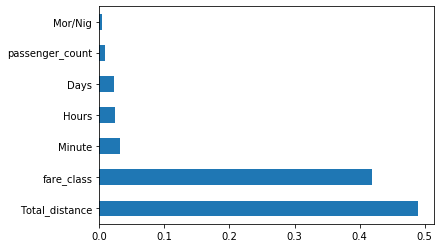

In [22]:
### Ploting impotant featuer through graph.
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(7).plot(kind='barh')
plt.show()

In [23]:
### Splitting data into training and testing variable.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:
import xgboost
regressor=xgboost.XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
y_pred=regressor.predict(x_test)
print(y_pred)

[13.23106    7.1053505  5.6195374 ... 12.60955    5.980963   8.0271015]


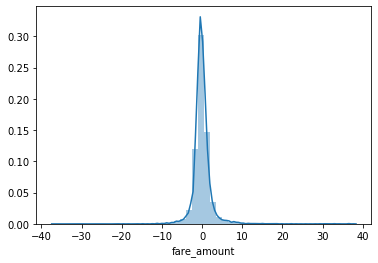

In [29]:
sns.distplot(y_test-y_pred)

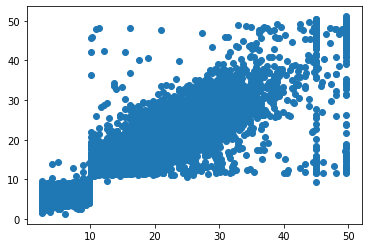

In [31]:
plt.scatter(y_test,y_pred)

In [32]:
from sklearn import metrics
print("MAE ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE  1.4026854929045836
MSE  6.9663924959100045
RMSE  2.639392448255849


### Artificial Neural Network(Regressor)

In [35]:
## Importing some Inportant Libraries.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,ELU
from tensorflow.keras.layers import Dropout

In [39]:
model=Sequential()

## Input Layer.

model.add(Dense(128,kernel_initializer='normal',input_dim=x_train.shape[1],activation='relu'))

## Creating the hidden layers.
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))

# creating the output layer.
model.add(Dense(1,kernel_initializer='normal',activation='linear'))

## Compiling the neural network.
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________


In [40]:
### Fitting the data into Taining Set.
model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=20)

Train on 56279 samples, validate on 27721 samples
Epoch 1/20
56279/56279 [==============================] - 22s 386us/sample - loss: 2.1642 - mean_absolute_error: 2.1642 - val_loss: 1.6210 - val_mean_absolute_error: 1.6210
Epoch 2/20
56279/56279 [==============================] - 21s 375us/sample - loss: 1.7494 - mean_absolute_error: 1.7494 - val_loss: 1.8702 - val_mean_absolute_error: 1.8702
Epoch 3/20
56279/56279 [==============================] - 22s 397us/sample - loss: 1.7047 - mean_absolute_error: 1.7047 - val_loss: 1.5916 - val_mean_absolute_error: 1.5916
Epoch 4/20
56279/56279 [==============================] - 21s 367us/sample - loss: 1.6745 - mean_absolute_error: 1.6745 - val_loss: 1.8577 - val_mean_absolute_error: 1.8577
Epoch 5/20
56279/56279 [==============================] - 25s 444us/sample - loss: 1.6692 - mean_absolute_error: 1.6692 - val_loss: 1.5773 - val_mean_absolute_error: 1.5773
Epoch 6/20
56279/56279 [==============================] - 25s 450us/sample - loss: 1.

### Model Evalution.

In [42]:
y_pred=model.predict(x_test)
print(y_pred)

[[11.808105 ]
 [ 7.5176296]
 [ 5.898079 ]
 ...
 [11.888744 ]
 [ 6.0975804]
 [ 7.9023576]]


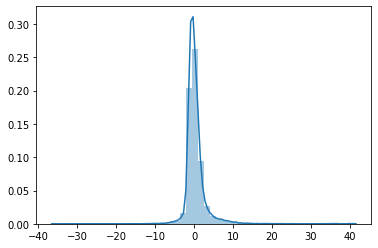

In [45]:
sns.distplot(y_test.values.reshape(-1,1)-y_pred)

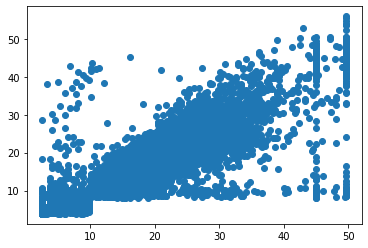

In [46]:
plt.scatter(y_test,y_pred)

In [47]:
from sklearn import metrics
print("MAE ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE  1.5150875947819815
MSE  9.179367735305066
RMSE  3.029747140489626
